In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle as pkl

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df1 = pd.read_csv('Makaan_Properties.csv')

In [ ]:
df1.head()

,Property_type,Property_status,Price_per_unit_area,City_id,City_name,No_of_BHK,Locality_Name,Price,Size,Furnished,RERA_registered,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Apartment,Under Construction,"4,285",1,Ahmedabad,3 BHK,Bopal,"75,00,000","1,750 sq ft",Unfurnished,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apartment,Under Construction,"7,000",1,Ahmedabad,4 BHK,Ambli,"2,36,88,000","3,384 sq ft",Unfurnished,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apartment,Ready to move,"5,752",1,Ahmedabad,3 BHK,Naryanpura,"1,32,00,840","2,295 sq ft",Unfurnished,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apartment,Ready to move,"2,486",1,Ahmedabad,2 BHK,Changodar,"22,83,000",918 sq ft,Unfurnished,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Apartment,Under Construction,"5,324",1,Ahmedabad,3 BHK,Shilaj,"93,71,000","1,760 sq ft",Unfurnished,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df1[['Size','No_of_BHK','Furnished','Property_type','City_name','Price']]

In [ ]:
print(df.shape)

(332096, 6)


In [ ]:
df.head()

,Size,No_of_BHK,Furnished,Property_type,City_name,Price
0,"1,750 sq ft",3 BHK,Unfurnished,Apartment,Ahmedabad,"75,00,000"
1,"3,384 sq ft",4 BHK,Unfurnished,Apartment,Ahmedabad,"2,36,88,000"
2,"2,295 sq ft",3 BHK,Unfurnished,Apartment,Ahmedabad,"1,32,00,840"
3,918 sq ft,2 BHK,Unfurnished,Apartment,Ahmedabad,"22,83,000"
4,"1,760 sq ft",3 BHK,Unfurnished,Apartment,Ahmedabad,"93,71,000"


In [ ]:
print(df.isnull().sum())

Size             0
No_of_BHK        0
Furnished        0
Property_type    0
City_name        0
Price            0
dtype: int64


In [ ]:
df.describe()

,Size,No_of_BHK,Furnished,Property_type,City_name,Price
count,332096,332096,332096,332096,332096,332096
unique,5040,18,3,5,8,49493
top,"1,000 sq ft",0 BHK,Unfurnished,Apartment,Mumbai,"4,19,000"
freq,31121,93765,245783,188922,94339,4850


In [ ]:
print(df.dtypes)

Size             object
No_of_BHK        object
Furnished        object
Property_type    object
City_name        object
Price            object
dtype: object


In [ ]:
# Convert the Size and Price to numerical from object type
df['Size'] = df['Size'].str.replace('sq ft','',regex=False)
df['Size'] = df['Size'].str.replace(',','',regex=False)
df['Size'] = df['Size'].str.strip()
df['Size'] = pd.to_numeric(df['Size'])
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))

C:\Users\pulin\AppData\Local\Temp\ipykernel_3620\3606215186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].str.replace('sq ft','',regex=False)
C:\Users\pulin\AppData\Local\Temp\ipykernel_3620\3606215186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].str.replace(',','',regex=False)
C:\Users\pulin\AppData\Local\Temp\ipykernel_3620\3606215186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [ ]:
df.head()

,Size,No_of_BHK,Furnished,Property_type,City_name,Price
0,1750,3 BHK,Unfurnished,Apartment,Ahmedabad,7500000
1,3384,4 BHK,Unfurnished,Apartment,Ahmedabad,23688000
2,2295,3 BHK,Unfurnished,Apartment,Ahmedabad,13200840
3,918,2 BHK,Unfurnished,Apartment,Ahmedabad,2283000
4,1760,3 BHK,Unfurnished,Apartment,Ahmedabad,9371000


In [ ]:
df.describe()

,Size,Price
count,3.320960e+05,3.320960e+05
mean,1.555597e+03,1.536295e+07
std,1.910347e+04,4.632372e+07
min,1.000000e+01,3.000000e+03
25%,8.390000e+02,2.800000e+06
50%,1.103000e+03,6.000000e+06
75%,1.605000e+03,1.250000e+07
max,8.712000e+06,1.000000e+09


In [ ]:
df['Price'] = df['Price']/100000
df['Size'] = df['Size']/1000

C:\Users\pulin\AppData\Local\Temp\ipykernel_3620\232241472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price']/100000
C:\Users\pulin\AppData\Local\Temp\ipykernel_3620\232241472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size']/1000


In [ ]:
print(df.dtypes)

Size             float64
No_of_BHK         object
Furnished         object
Property_type     object
City_name         object
Price            float64
dtype: object


In [ ]:
df.head()

,Size,No_of_BHK,Furnished,Property_type,City_name,Price
0,1.750,3 BHK,Unfurnished,Apartment,Ahmedabad,75.0000
1,3.384,4 BHK,Unfurnished,Apartment,Ahmedabad,236.8800
2,2.295,3 BHK,Unfurnished,Apartment,Ahmedabad,132.0084
3,0.918,2 BHK,Unfurnished,Apartment,Ahmedabad,22.8300
4,1.760,3 BHK,Unfurnished,Apartment,Ahmedabad,93.7100


In [ ]:
df["Property_type"].value_counts()

Property_type
Apartment            188922
Residential Plot      93765
Independent Floor     22554
Independent House     13553
Villa                 13302
Name: count, dtype: int64

In [ ]:
df['City_name'].value_counts()

City_name
Mumbai       94339
Chennai      42441
Hyderabad    42344
Bangalore    40463
Lucknow      40380
Delhi        37198
Kolkata      22981
Ahmedabad    11950
Name: count, dtype: int64

In [ ]:
df['Furnished'].value_counts()

Furnished
Unfurnished       245783
Semi-Furnished     72042
Furnished          14271
Name: count, dtype: int64

In [ ]:
dict1 = {
    "Apartment" : 0,
    "Residential Plot" : 1,
    "Independent Floor" : 2,
    "Independent House" : 3,
    "Villa" : 4
}

dict2 = {
    "Mumbai" : 0,
    "Chennai" : 1,
    "Hyderabad" : 2,
    "Bangalore" : 3,
    "Lucknow" : 4,
    "Delhi" : 5,
    "Kolkata" : 6,
    "Ahmedabad" : 7
}

dict3 = {
    "Unfurnished" : 0,
    "Semi-Furnished" : 1,
    "Furnished" : 2,
}

df["Property_type"] = df["Property_type"].map(dict1)
df['City_name'] = df['City_name'].map(dict2)
df['Furnished'] = df['Furnished'].map(dict3)

C:\Users\pulin\AppData\Local\Temp\ipykernel_3620\3628261306.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Property_type"] = df["Property_type"].map(dict1)
C:\Users\pulin\AppData\Local\Temp\ipykernel_3620\3628261306.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City_name'] = df['City_name'].map(dict2)
C:\Users\pulin\AppData\Local\Temp\ipykernel_3620\3628261306.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [ ]:
df['No_of_BHK'] = df["No_of_BHK"].str.split(" ").str[0].astype(int)

C:\Users\pulin\AppData\Local\Temp\ipykernel_3620\3023177450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_BHK'] = df["No_of_BHK"].str.split(" ").str[0].astype(int)


In [ ]:
df.head()

,Size,No_of_BHK,Furnished,Property_type,City_name,Price
0,1.750,3,0,0,7,75.0000
1,3.384,4,0,0,7,236.8800
2,2.295,3,0,0,7,132.0084
3,0.918,2,0,0,7,22.8300
4,1.760,3,0,0,7,93.7100


In [ ]:
df.dtypes

Size             float64
No_of_BHK          int32
Furnished          int64
Property_type      int64
City_name          int64
Price            float64
dtype: object

In [ ]:
df.to_csv("Processed_data.csv",index=False)

## Visualiation of Categorial data

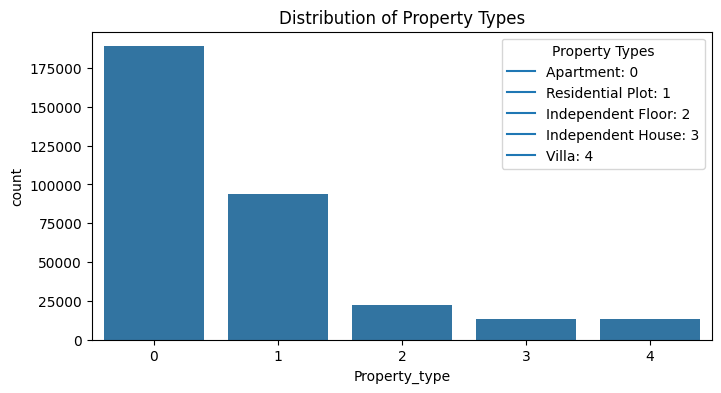

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Property_type', data=df)
plt.title('Distribution of Property Types')
handles = [
    plt.Line2D([0], [0], label='Apartment: 0'),
    plt.Line2D([0], [0], label='Residential Plot: 1'),
    plt.Line2D([0], [0], label='Independent Floor: 2'),
    plt.Line2D([0], [0], label='Independent House: 3'),
    plt.Line2D([0], [0], label='Villa: 4'),
]
plt.legend(handles=handles, title='Property Types', loc='upper right')
plt.show()

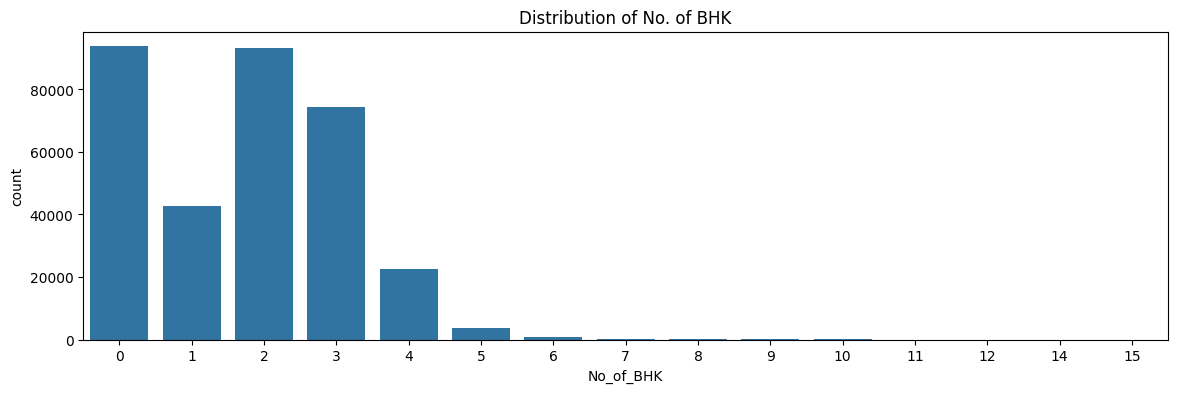

In [ ]:
plt.figure(figsize=(14, 4))
sns.countplot(x='No_of_BHK', data=df)
plt.title('Distribution of No. of BHK')
plt.show()

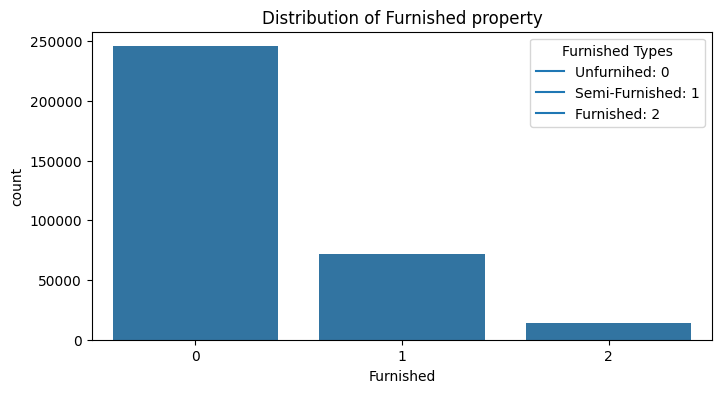

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Furnished', data=df)
plt.title('Distribution of Furnished property')
handles = [
    plt.Line2D([0], [0], label='Unfurnihed: 0'),
    plt.Line2D([0], [0], label='Semi-Furnished: 1'),
    plt.Line2D([0], [0], label='Furnished: 2'),
]
plt.legend(handles=handles, title='Furnished Types', loc='upper right')
plt.show()

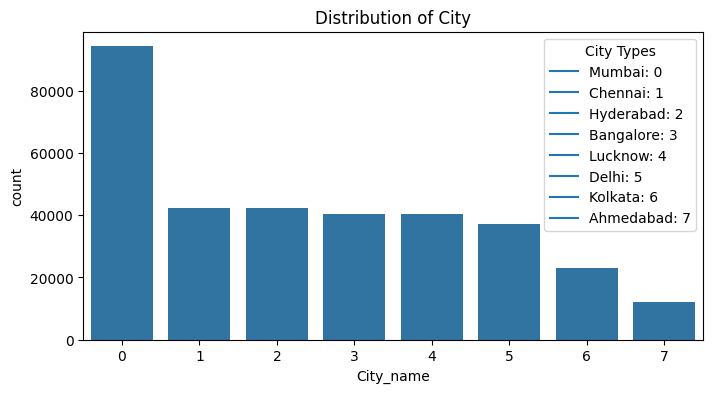

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='City_name', data=df)
plt.title('Distribution of City')
handles = [
    plt.Line2D([0], [0], label='Mumbai: 0'),
    plt.Line2D([0], [0], label='Chennai: 1'),
    plt.Line2D([0], [0], label='Hyderabad: 2'),
    plt.Line2D([0], [0], label='Bangalore: 3'),
    plt.Line2D([0], [0], label='Lucknow: 4'),
    plt.Line2D([0], [0], label='Delhi: 5'),
    plt.Line2D([0], [0], label='Kolkata: 6'),
    plt.Line2D([0], [0], label='Ahmedabad: 7'),
]
plt.legend(handles=handles, title='City Types', loc='upper right')
plt.show()

## Visualiation of Numerical data

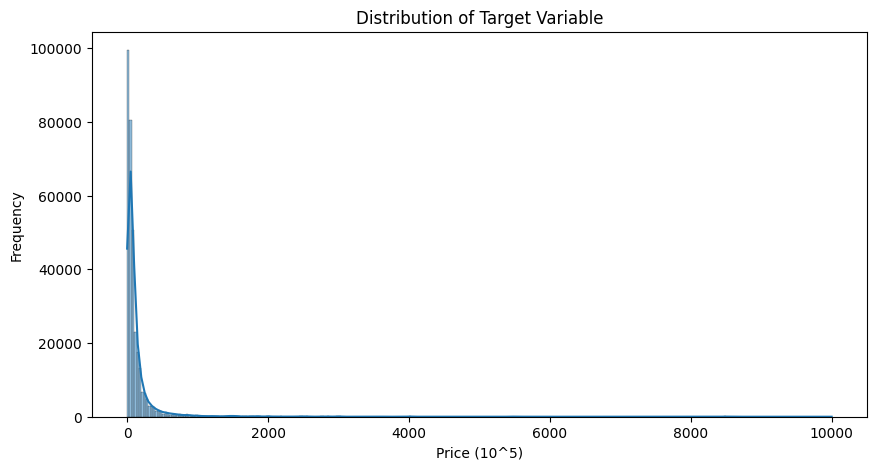

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], kde=True, bins=300)
plt.title('Distribution of Target Variable')
plt.xlabel('Price (10^5)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# 1. Distribution of Property Prices
plt.figure(figsize=(10, 6))
sns.histplot(x='Price', bins=50, kde=True, color='blue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price (in INR)')
plt.ylabel('Frequency')
plt.show()

ValueError: Could not interpret value `Price` for `x`. Value is a string, but `data` was not passed.

<Figure size 1000x600 with 0 Axes>

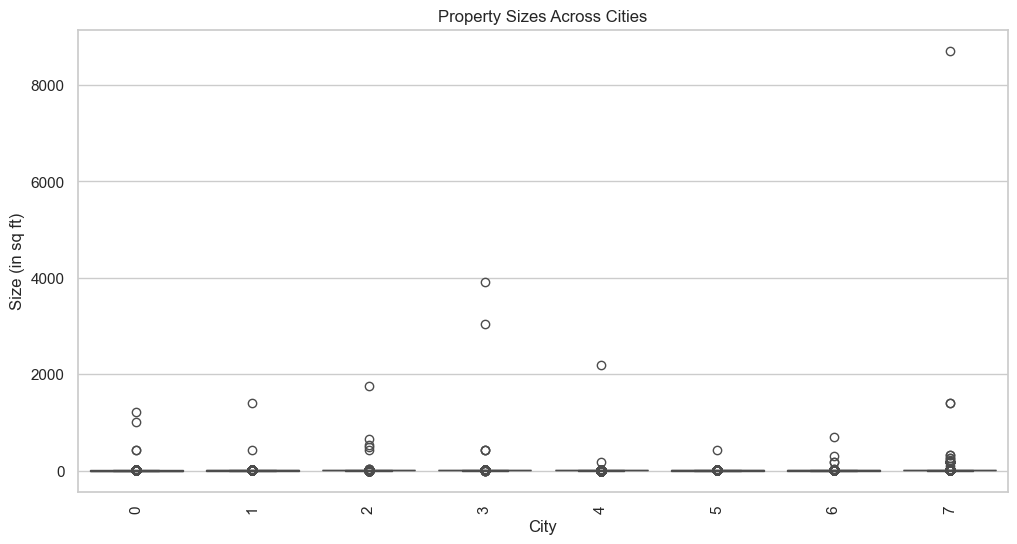

In [ ]:
# 2. Property Sizes Across Cities
plt.figure(figsize=(12, 6))
sns.boxplot(x='City_name', y='Size', data=df)
plt.xticks(rotation=90)
plt.title('Property Sizes Across Cities')
plt.xlabel('City')
plt.ylabel('Size (in sq ft)')
plt.show()


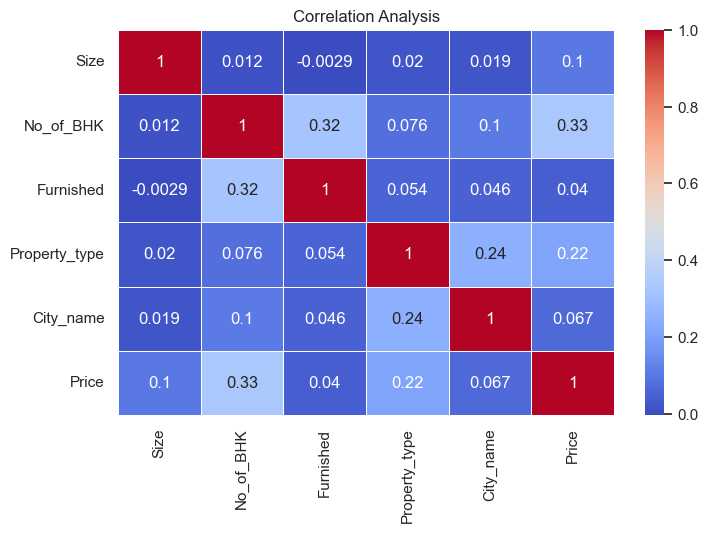

In [ ]:
# Size	No_of_BHK	Furnished	Property_type	City_name	Price
correlation_matrix = df[['Size', 'No_of_BHK', 'Furnished', 'Property_type', 'City_name', 'Price']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Analysis')
plt.show()